In [38]:
import torch
from torchvision.io import ImageReadMode, read_image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from functools import reduce

In [39]:
def show_image(x: torch.Tensor, ax=None):
    if x.dim() == 3:
        x = x.permute(1, 2, 0)
    
    if ax is None:
        plt.imshow(x)
    else:
        ax.imshow(x)

In [40]:
def compose_funcs(obj, func_list):
    return reduce(lambda o, func: func(o), func_list, obj)

In [71]:
def rotate90(img: torch.Tensor) -> torch.Tensor:
    return TF.rotate(img, 90)

def rotate180(img: torch.Tensor) -> torch.Tensor:
    return TF.rotate(img, 180)

def rotate270(img: torch.Tensor) -> torch.Tensor:
    return TF.rotate(img, 270)

In [72]:
TRANSFORMS = "vhr"

# Config parsing
if "".join(sorted(TRANSFORMS)) not in ["", "h", "r", "v", "hr", "hv", "rv", "hrv"]:
    raise ValueError("Transforms should be a combination of 'v', 'h', and 'r'.")

# Create all combinations of transformations
transformations = [[]]
if "v" in TRANSFORMS:
    transformations += [fns + [TF.vflip] for fns in transformations]

if "h" in TRANSFORMS:
    transformations += [fns + [TF.hflip] for fns in transformations]

if "r" in TRANSFORMS:
    new_transformations = []
    new_transformations += [fns + [rotate90] for fns in transformations]
    new_transformations += [fns + [rotate180] for fns in transformations]
    new_transformations += [fns + [rotate270] for fns in transformations]

    transformations += new_transformations

In [78]:
compose_funcs(target_BHW.unsqueeze(1), transformations[7]).shape

torch.Size([400, 1, 400])

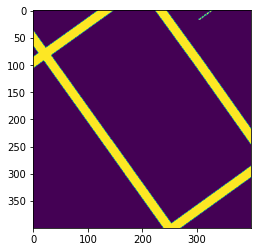

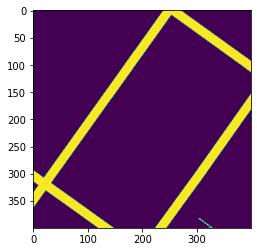

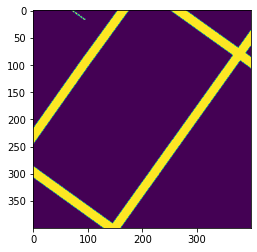

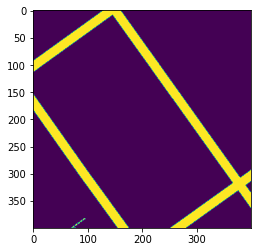

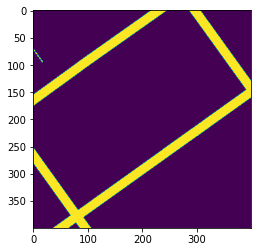

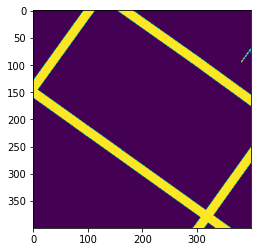

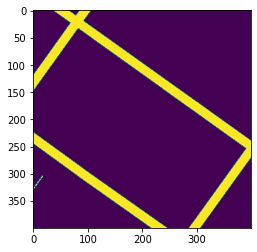

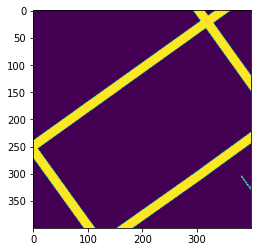

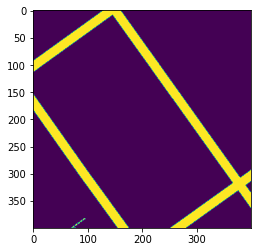

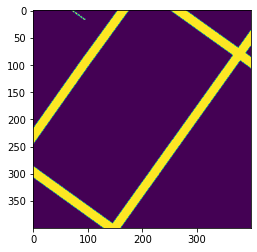

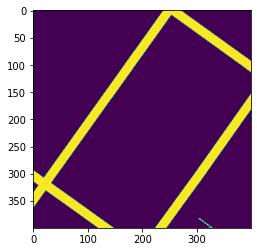

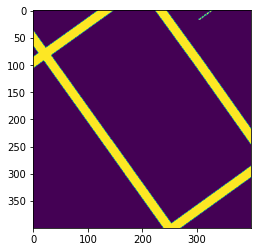

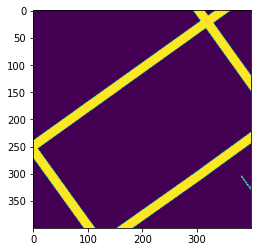

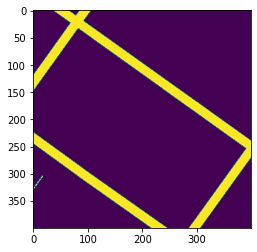

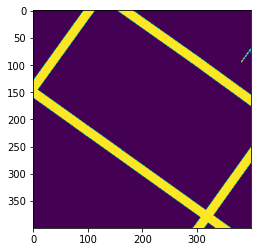

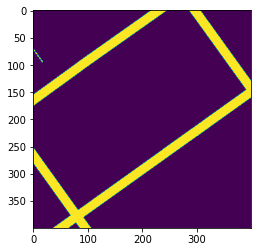

In [83]:
for transforms in transformations:
    show_image(compose_funcs(target_BHW.unsqueeze(0), transforms))
    plt.show()

In [77]:
transformations[6]

[<function torchvision.transforms.functional.hflip(img: torch.Tensor) -> torch.Tensor>,
 <function __main__.rotate90(img: torch.Tensor) -> torch.Tensor>]

In [26]:
input_BCHW = read_image("data/training/images/satimage_1.png", ImageReadMode.RGB)
target_BHW = read_image("data/training/groundtruth/satimage_1.png", ImageReadMode.GRAY).squeeze(0)

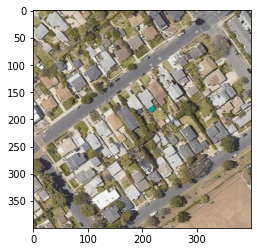

RuntimeError: grid_sampler(): expected grid to have size 1 in last dimension, but got grid with sizes [1, 400, 400, 2]

In [33]:
index = 4

show_image(transformations[index](input_BCHW))
plt.show()
show_image(transformations[index](target_BHW))
plt.show()

In [7]:
target_BHW.shape

torch.Size([400, 400])

tensor([[[115, 204, 166,  ..., 221, 227, 183],
         [147, 182, 207,  ..., 205, 219, 199],
         [130, 179, 196,  ..., 227, 205, 219],
         ...,
         [183, 189, 199,  ..., 174, 147, 196],
         [174, 180, 182,  ..., 174, 170, 182],
         [199, 179, 163,  ..., 156, 186, 199]],

        [[112, 199, 162,  ..., 219, 223, 180],
         [143, 179, 203,  ..., 203, 211, 195],
         [129, 175, 191,  ..., 223, 203, 215],
         ...,
         [180, 187, 195,  ..., 171, 143, 191],
         [171, 173, 179,  ..., 171, 167, 179],
         [195, 175, 156,  ..., 151, 183, 195]],

        [[114, 195, 156,  ..., 207, 212, 165],
         [140, 173, 195,  ..., 191, 199, 183],
         [130, 171, 187,  ..., 212, 191, 203],
         ...,
         [165, 181, 183,  ..., 165, 140, 187],
         [165, 163, 173,  ..., 165, 163, 173],
         [183, 171, 148,  ..., 148, 179, 191]]], dtype=torch.uint8)